# Web Mining and Applied NLP (44-620)
## Final Project: Article Summarizer
### Student Name: Susie Smith
#### GitHub Repo: https://github.com/msmixj/article-summarizer 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.
You should bring in code from previous assignments to help you answer the questions below.
Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [14]:
from collections import Counter 
from random import randint
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import json
import pickle

import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

print('All prereqs installed.')
!pip list

All prereqs installed.
Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.2.1
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat               

#### Question #1

Q1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

The article I have chosen for this assignment is an article about the mental health of athletes. This can be found at the following url: https://globalsportmatters.com/health/2023/05/26/college-athlete-mental-health-raising-alarm-locker-rooms-group-chats-capitol-hill/ 

In [15]:
# URL of the article: 
url = "https://globalsportmatters.com/health/2023/05/26/college-athlete-mental-health-raising-alarm-locker-rooms-group-chats-capitol-hill/"

# Send a GET request to the URL:
response = requests.get(url)

# Checking the status of the GET request:
if response.status_code == 200:
    # Get the HTML content of the webpage
    html_content = response.text
    # Save the html content to a file 
    with open("article.html", "w", encoding="utf-8") as f:
        f.write(html_content)
        
    print("Article HTML content has been saved to the file 'article.html'")
else:
    print("Failed to retrieve article. Status code:", response.status_code)


Article HTML content has been saved to the file 'article.html'


In [16]:
print(article_text)











The College Athlete Mental Health Effort Moves to Capitol Hill


The College Athlete Mental Health Effort Moves to Capitol Hill


















































Skip to main content









Issues
Sections
About









 



























Current Issue




                    The Modern Sportswoman                  


Past Issues
Sport's Next Generation
NIL & the Modern College Athlete
The World of Football
Athletes & Activism
Access & Opportunity in Sport



View All



















Sections
Business
Culture
Health
Research
Youth
Events
Listen
Watch
Opinion
From Our Lab















                    NASHVILLE, TN - DECEMBER 12: Vanderbilt Commodores place kicker Sarah Fuller (32) prior to a game between the Vanderbilt Commodores and Tennessee Volunteers, December 12, 2020 at Vanderbilt Stadium in Nashville, Tennessee. (Photo by Matthew Maxey/Icon Sportswire via Getty Images)                  











    Health  
College Athletes Are R

#### Question #2
Q2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [11]:
from bs4 import BeautifulSoup
from textblob import TextBlob

with open("article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

#Parse HTML
soup = BeautifulSoup(html_content, "html.parser")

#Get text from HTML
article_text = soup.get_text()

#Perform sentiment analysis
sentiment = TextBlob(article_text).sentiment

#Print polarity score
print("Sentiment Polarity Score:", sentiment.polarity)

#Count number of sentences
sentences = article_text.split('.')
num_sentences = len(sentences)

print("Number of sentences:", num_sentences)


Sentiment Polarity Score: 0.10329560626289594
Number of sentences: 188


#### Question #3
Q3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [31]:
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
from bs4 import BeautifulSoup

with open('article.html', 'r', encoding='utf-8') as file:
    article_html = file.read()

soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()
nlp = spacy.load("en_core_web_sm")
document = nlp(text)
tokens = [token.text.lower() for token in document if token.is_alpha and token.text.lower() not in STOP_WORDS]

# Count the number of tokens
counter = Counter(tokens)

# Get the 5 most frequent tokens
top_5_tokens = counter.most_common(5)

# Print the 5 most frequent tokens
print("The 5 most frequent tokens:")
for token, frequency in top_5_tokens:
    print(f'{token}: {frequency}')

# Print all tokens with frequencies
print("\nAll tokens with frequencies:")
for token, frequency in counter.items():
    print(f'{token}: {frequency}')

The 5 most frequent tokens:
health: 57
mental: 55
athletes: 40
student: 38
fuller: 29

All tokens with frequencies:
college: 20
athlete: 20
mental: 55
health: 57
effort: 2
moves: 2
capitol: 5
hill: 5
skip: 1
main: 1
content: 2
issues: 2
sections: 2
current: 3
issue: 1
modern: 2
sportswoman: 1
past: 2
sport: 15
generation: 1
nil: 1
world: 3
football: 8
athletes: 40
activism: 1
access: 2
opportunity: 1
view: 2
business: 2
culture: 1
research: 3
youth: 2
events: 1
listen: 2
watch: 1
opinion: 1
lab: 1
nashville: 3
tn: 1
december: 3
vanderbilt: 7
commodores: 2
place: 4
kicker: 1
sarah: 3
fuller: 29
prior: 1
game: 5
tennessee: 3
volunteers: 1
stadium: 1
photo: 1
matthew: 1
maxey: 1
icon: 1
sportswire: 1
getty: 1
images: 1
raising: 1
alarm: 1
locker: 2
rooms: 1
group: 3
chats: 1
way: 4
anna: 2
katherine: 2
clemmons: 2
friday: 1
like: 12
matters: 4
campuses: 4
united: 2
states: 2
rally: 1
reckon: 1
gen: 1
z: 1
taking: 3
efforts: 1
hands: 1
night: 3
spring: 2
break: 2
march: 5
amid: 1
offseason

#### Question #4
Q4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [32]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

with open('article.html', 'r', encoding='utf-8') as file:
    article_html = file.read()
    
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()
nlp = spacy.load('en_core_web_sm')
document = nlp(text)

lemmas = [token.lemma_.lower() for token in document if token.is_alpha and not token.is_stop]
lemma_counter = Counter(lemmas)
top_5_lemmas = lemma_counter.most_common(5)

print("The 5 most frequent lemmas:")
for lemma, frequency in top_5_lemmas:
    print(f"{lemma}: {frequency}")

print("\nAll lemmas with frequencies:")
for lemma, frequency in lemma_counter.items():
    print(f"{lemma}: {frequency}")


The 5 most frequent lemmas:
athlete: 58
health: 57
mental: 55
student: 43
say: 32

All lemmas with frequencies:
college: 22
athlete: 58
mental: 55
health: 57
effort: 3
move: 2
capitol: 5
hill: 5
skip: 1
main: 1
content: 2
issues: 2
section: 1
current: 3
issue: 2
modern: 2
sportswoman: 1
past: 2
sport: 29
generation: 1
nil: 1
world: 3
football: 8
athletes: 2
activism: 1
access: 2
opportunity: 2
view: 2
sections: 1
business: 2
culture: 1
research: 3
youth: 2
event: 1
listen: 2
watch: 1
opinion: 1
lab: 1
nashville: 3
tn: 1
december: 3
vanderbilt: 7
commodores: 2
place: 4
kicker: 1
sarah: 3
fuller: 29
prior: 1
game: 5
tennessee: 3
volunteers: 1
stadium: 1
photo: 2
matthew: 1
maxey: 1
icon: 1
sportswire: 1
getty: 1
images: 1
raise: 2
alarm: 1
locker: 2
rooms: 1
group: 3
chat: 1
way: 7
anna: 2
katherine: 2
clemmons: 2
friday: 1
like: 12
matter: 3
campus: 7
united: 2
states: 2
rally: 1
reckon: 1
gen: 1
z: 1
take: 4
hand: 1
night: 3
spring: 2
break: 3
march: 5
amid: 1
offseason: 1
workout: 1
g

#### Question #5
Q5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\15152\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
from bs4 import BeautifulSoup
from textblob import TextBlob

with open('article.html', 'r', encoding='utf-8') as file:
    article_html = file.read()

soup = BeautifulSoup(article_html, 'html.parser')

text = ''
for paragraph in soup.find_all('p'):
    text +=paragraph.get_text() + ' '

def score_sentence_by_token(sentence, token):
    tokens = sentence.split()
    token_count = sum(1 for token in tokens if token.lower() in tokens)
    score = token_count / len(tokens) if tokens else 0
    return score

blob = TextBlob(text)
sentences = blob.sentences

for i, sentence in enumerate(sentences, start=1):
    token_score = score_sentence_by_token(str(sentence), tokens)
    print(f"Sentence {i} Token Score:", token_score)

token_scores = [score_sentence_by_token(str(sentence), tokens) for sentence in sentences]

Sentence 1 Token Score: 0.8076923076923077
Sentence 2 Token Score: 0.7837837837837838
Sentence 3 Token Score: 0.8
Sentence 4 Token Score: 0.8611111111111112
Sentence 5 Token Score: 0.8636363636363636
Sentence 6 Token Score: 0.75
Sentence 7 Token Score: 0.4444444444444444
Sentence 8 Token Score: 0.9166666666666666
Sentence 9 Token Score: 0.9473684210526315
Sentence 10 Token Score: 0.5
Sentence 11 Token Score: 0.8
Sentence 12 Token Score: 0.84
Sentence 13 Token Score: 0.9090909090909091
Sentence 14 Token Score: 1.0
Sentence 15 Token Score: 0.6
Sentence 16 Token Score: 0.8095238095238095
Sentence 17 Token Score: 0.5833333333333334
Sentence 18 Token Score: 0.9545454545454546
Sentence 19 Token Score: 0.8536585365853658
Sentence 20 Token Score: 0.9393939393939394
Sentence 21 Token Score: 0.9090909090909091
Sentence 22 Token Score: 0.95
Sentence 23 Token Score: 0.8222222222222222
Sentence 24 Token Score: 0.75
Sentence 25 Token Score: 0.8113207547169812
Sentence 26 Token Score: 0.9230769230769

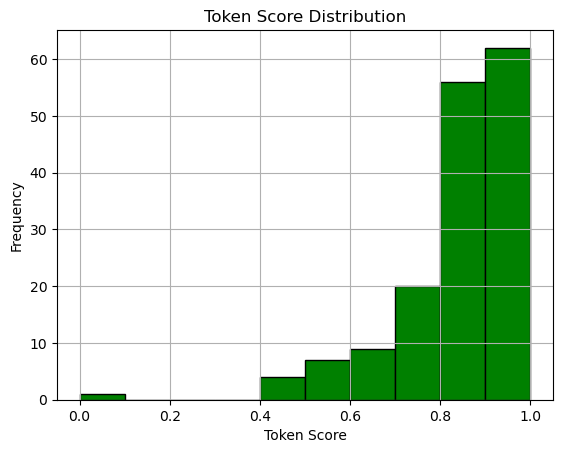

In [47]:
# Plot histogram
import matplotlib.pyplot as plt
 
plt.hist(token_scores, color='green', edgecolor='black')
plt.title('Token Score Distribution')
plt.xlabel('Token Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Question #5 observation from histogram: 
# It looks like most of the scores are between 0.8 and 1.0.

#### Question #6
Q6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [56]:
#Getting set of top 5 lemmas by freq (found in question 4)
lemmas = set()
for lemma, frequency in top_5_lemmas:
    lemmas.add(lemma)

#Looping through sentences to find the score
for sentence in list(document.sents):
    start= 0
    for lemma in sentence:
        if lemma.lemma_.lower() in lemmas:
            start+= 1
    start2 = 0
    for lemma in sentence:
        if not(lemma.is_space or lemma.is_punct):
            start2 += 1
    #creating ourput that will show full sentence and the lemma score
    sentence_list = str(sentence).replace('\n','').replace('  ',' ')
    print(start/start2,':',sentence_list)

0.08080808080808081 : The College Athlete Mental Health Effort Moves to Capitol HillThe College Athlete Mental Health Effort Moves to Capitol HillSkip to main contentIssuesSectionsAbout Current Issue          The Modern Sportswoman         Past IssuesSport's Next GenerationNIL & the Modern College AthleteThe World of FootballAthletes & ActivismAccess & Opportunity in SportView AllSectionsBusinessCultureHealthResearchYouthEventsListenWatchOpinionFrom Our Lab          NASHVILLE, TN - DECEMBER 12: Vanderbilt Commodores place kicker Sarah Fuller (32) prior to a game between the Vanderbilt Commodores and Tennessee Volunteers, December 12, 2020 at Vanderbilt Stadium in Nashville, Tennessee.
0.10144927536231885 : (Photo by Matthew Maxey/Icon Sportswire via Getty Images)           Health College Athletes Are Raising the Alarm on Mental Health From Locker Rooms and Group Chats All the Way to Capitol HillAnna Katherine Clemmons | Friday, May 26, 2023LikeWhy this mattersAs college campuses across

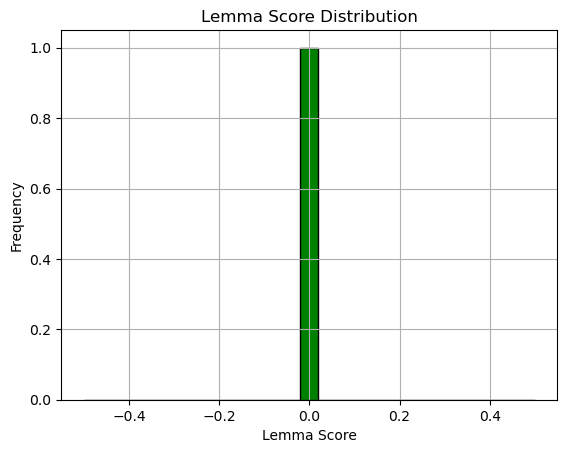

In [59]:
plt.hist(start/start2, bins=25, color='green', edgecolor='black')
plt.title('Lemma Score Distribution')
plt.xlabel('Lemma Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?